In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format='svg'

# Correlation Coefficients with Numpy

In [9]:
x = np.arange(10,20)
y = np.arange(10) + np.random.randint(0,10,10)

In [10]:
y

array([ 8,  7,  4,  7,  4, 12, 14, 10, 13, 18])

In [11]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.77073168],
       [0.77073168, 1.        ]])

In [12]:
r[0,1]

0.7707316804213933

The variable $r$ holds the Pearson correlation coefficients for $x$ and $y$. 

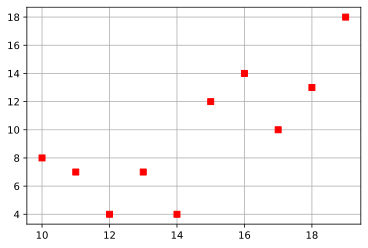

In [15]:
plt.plot(x, y, 'rs')
plt.grid()

Scipy also has many statistics methods that we can use to determine correlation.

In [16]:
import scipy.stats

In [17]:
x = np.arange(10,20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [19]:
scipy.stats.pearsonr(x,y)   # Pearson's r

(0.7586402890911869, 0.010964341301680832)

In [20]:
scipy.stats.spearmanr(x,y)  # Spearman's rho

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [21]:
scipy.stats.kendalltau(x,y)  

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [23]:
# Can use dot notation to get correlation value
scipy.stats.spearmanr(x,y).correlation

0.9757575757575757

In [25]:
scipy.stats.spearmanr(x,y).pvalue

1.4675461874042197e-06

# Correlation with Pandas

In [28]:
x = pd.Series(range(10,20))
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [29]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [30]:
x.corr(y)

0.7586402890911867

In [31]:
y.corr(x)

0.7586402890911869

In [32]:
x.corr(y, method='spearman')

0.9757575757575757

In [33]:
y.corr(x, method='kendall')

0.911111111111111

# Linear Regression in Scipy

In [52]:
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [53]:
result = scipy.stats.linregress(x, y)

In [54]:
result.slope

7.4363636363636365

In [55]:
result.intercept

-85.92727272727274

In [56]:
result.rvalue

0.7586402890911869

In [57]:
result.pvalue

0.010964341301680825

In [58]:
result.stderr

2.257878767543913

## Passing an ND array as an argument

In [59]:
xy = np.r_[x, y].reshape(2, len(x))

In [60]:
xy

array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48]])

In [61]:
scipy.stats.linregress(xy)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [62]:
scipy.stats.linregress(xy.T)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [63]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                 [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                 [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [64]:
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

# Pearson Correlation in Pandas

In [65]:
x = pd.Series(range(10,20))

In [66]:
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [67]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [68]:
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [69]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xy

,x-values,y-values
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [70]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})
xyz

,x-values,y-values,z-values
0,10,2,5
1,11,1,3
2,12,4,2
3,13,5,1
4,14,8,0
5,15,12,-2
6,16,18,-8
7,17,25,-11
8,18,96,-15
9,19,48,-16


In [72]:
corr_matrix = xy.corr()
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [73]:
corr_matrix.at['x-values', 'y-values']

0.7586402890911869

In [74]:
corr_matrix.iat[0,1]

0.7586402890911869

In [75]:
xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


In [76]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

## Rank

In [78]:
x = np.arange(10,20)

In [83]:
y

array([ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48])

In [85]:
z = z.to_numpy()

In [86]:
z

array([  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16])

In [87]:
scipy.stats.rankdata(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [88]:
scipy.stats.rankdata(y)

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  9.])

In [89]:
scipy.stats.rankdata(z)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

```rankdata()``` will give the average rank for ties, and treat ```NaN``` as if it were large.

In [90]:
scipy.stats.rankdata([8, 2, 0, 2])

array([4. , 2.5, 1. , 2.5])

In [91]:
scipy.stats.rankdata([8, np.nan, 0, 2])

array([3., 4., 1., 2.])

```argsort()``` will also get ranks:

In [92]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

# Rank Correlation with NumPy and SciPy

In [93]:
result = scipy.stats.spearmanr(x, y)

In [94]:
result

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [111]:
xy = xy.T.to_numpy()

In [114]:
rho, p = scipy.stats.spearmanr(xy, axis=1)

In [115]:
rho

0.9757575757575757

In [116]:
p

1.4675461874042197e-06

In [117]:
xyz = xyz.T.to_numpy()

In [118]:
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)

In [119]:
corr_matrix

array([[ 1.        ,  0.97575758, -1.        ],
       [ 0.97575758,  1.        , -0.97575758],
       [-1.        , -0.97575758,  1.        ]])

In [120]:
p_matrix

array([[6.64689742e-64, 1.46754619e-06, 6.64689742e-64],
       [1.46754619e-06, 6.64689742e-64, 1.46754619e-06],
       [6.64689742e-64, 1.46754619e-06, 6.64689742e-64]])

In [121]:
result = scipy.stats.kendalltau(x, y)

In [122]:
result

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

# Rank Correlation in Pandas

In [123]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)

In [124]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = xy = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

In [125]:
x.corr(y, method='spearman')

0.9757575757575757

In [126]:
xy.corr(method='spearman')

,x-values,y-values,z-values
x-values,1.000000,0.975758,-1.000000
y-values,0.975758,1.000000,-0.975758
z-values,-1.000000,-0.975758,1.000000


In [127]:
xyz.corr(method='spearman')

,x-values,y-values,z-values
x-values,1.000000,0.975758,-1.000000
y-values,0.975758,1.000000,-0.975758
z-values,-1.000000,-0.975758,1.000000


# Visualizing Results

In [128]:
plt.style.use('ggplot')

In [130]:
x, y, z = x.to_numpy(), y.to_numpy(), z.to_numpy

In [131]:
xyz = xyz.to_numpy()

In [134]:
xyz = xyz.T

In [135]:
xyz

array([[ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [  2,   1,   4,   5,   8,  12,  18,  25,  96,  48],
       [  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16]])

In [137]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [138]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-85.93+7.44x, r=0.76'

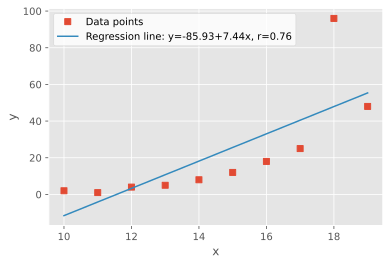

In [140]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmap of Correlation Matrices

In [141]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

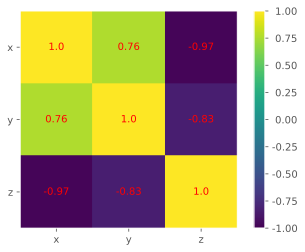

In [148]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('x','y','z'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('x','y','z'))
ax.set_ylim(2.5,-0.5)
for i in range(3):
    for j in range(3):
        ax.text(j,i, corr_matrix[i,j], ha='center', va='center', color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()